In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import glob, os

n = number of data points 
* 42 per subject
* 1554 for 37 subjects

k = number of free parameters
* 7 for free second gamma logl estimates
* 6 for fixed second gamma, community and transition logl estimates
* *n for group level bic

L = Log liklihood 
* sum of L for group level bic

In [2]:
def bic(k, n, L):
    return k*np.log(n) - 2*L

In [3]:
def get_bic(results, k, n, all_log=False):
    L = np.sum(results.log_like)
    subjects = results.subject
    N = len(subjects)
    
    if all_log:
        logs = np.array([results.query(f"subject == {sub}").log_like for sub in subjects])
        BIC = [bic(k,n, l[0]) for l in logs]
        df = pd.DataFrame({'log_like':BIC}, subjects)
        return df
    else:
        return bic(N*k, N*n, L)

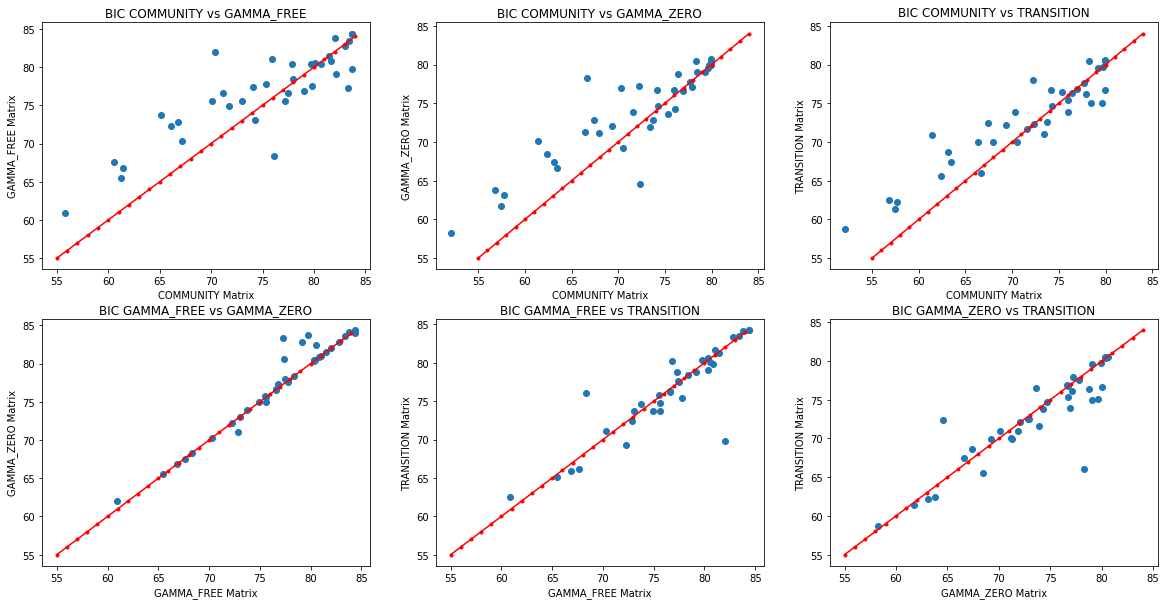

In [6]:

fig, axs = plt.subplots(2,3,figsize=(20,10))

files = [file for file in glob.glob("./Data/results/*.csv")]
c = list(itertools.combinations(files, 2))
unq = set(c)
l = sorted(unq)
listy = [u for u in l]

for f, i in enumerate(listy):
#     print(i[0], i[1])
    name = i[0]
    name_2 = i[1]
    if ('free' in name) or ('free' in name_2):
        k = 7
        s = np.arange(55, 85, 1)
    else:
        k =6
        s =np.arange(55, 85, 1)
    n = 42
    
    matrix1 = get_bic(pd.read_csv(name), k , n, True)
    name = name[15:-4].upper()

    matrix2 = get_bic(pd.read_csv(name_2), k, n, True)
    name_2 = name_2[15:-4].upper()
    
#     print(matrix1, matrix2)
#     print(pd.read_csv("./Data/results/community.csv"),matrix1)
    axs[f//3, f%3].scatter(matrix1.log_like, matrix2.log_like)
    axs[f//3, f%3].plot(s,s,marker='.',c='r')
    axs[f//3, f%3 ].set_title(f"BIC {name} vs {name_2}")
    axs[f//3, f%3 ].set_xlabel(f"{name} Matrix")
    axs[f//3, f%3 ].set_ylabel(f"{name_2} Matrix")
#     axs[f//3, f%3 ].set_xlim(s.min(),s.max())
#     axs[f//3, f%3 ].set_ylim(s.min(),s.max())
    
#     axs[3, 1].axis('off')
#     axs[3, 2].axis('off')

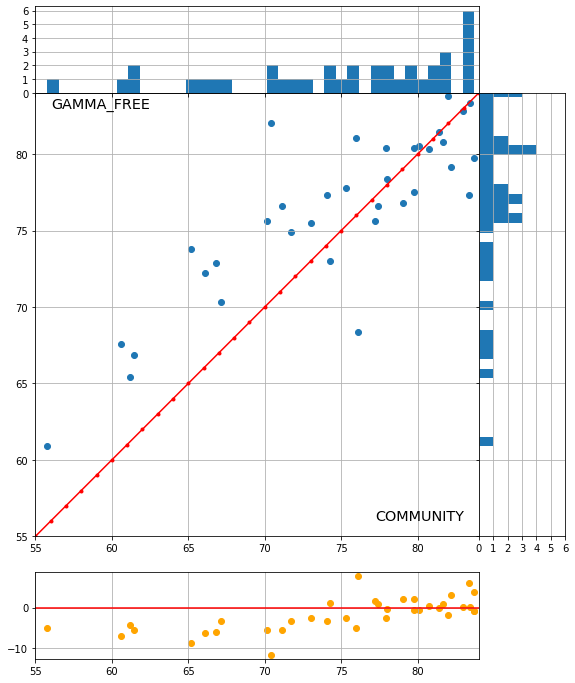

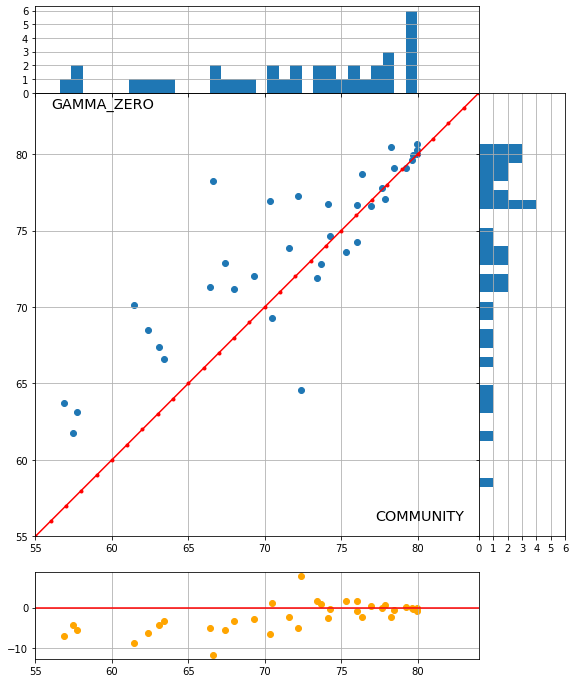

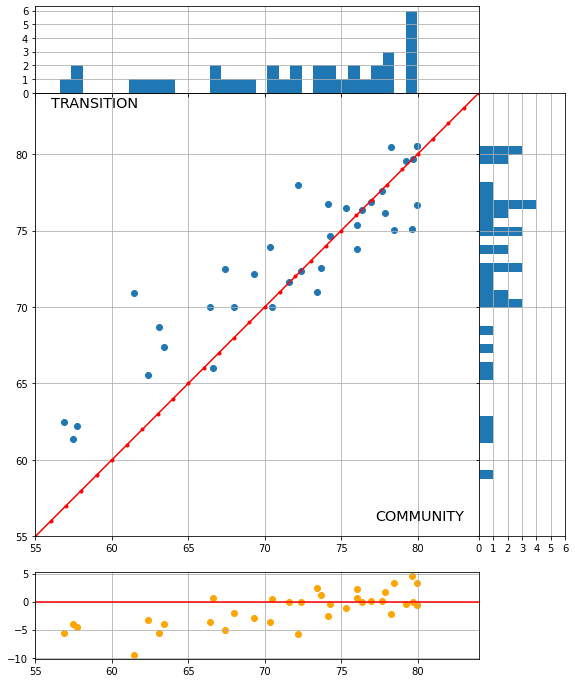

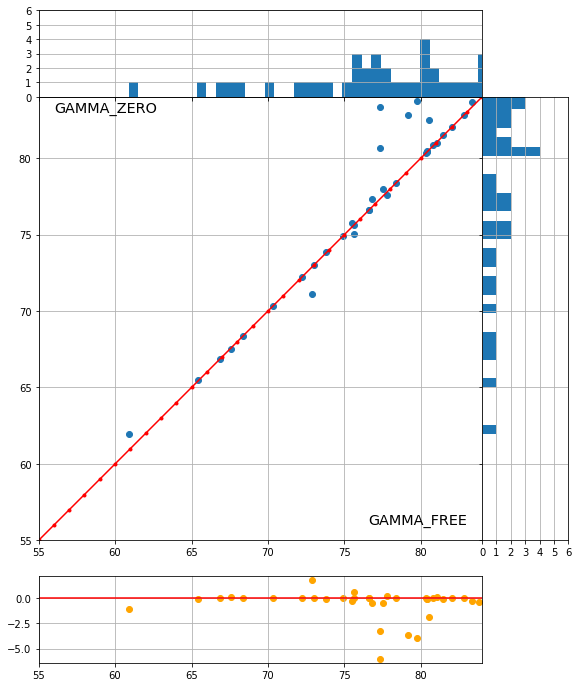

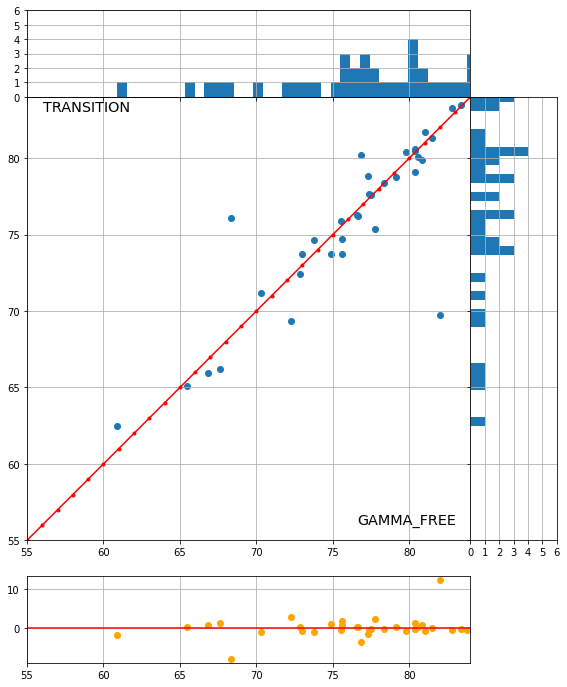

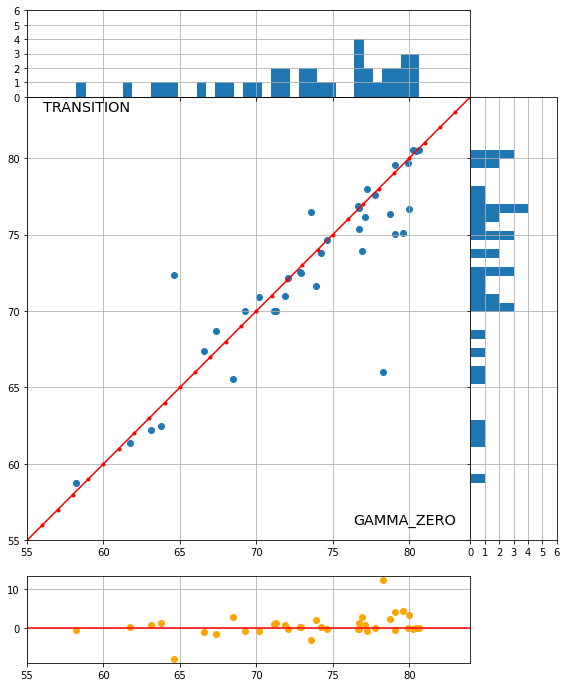

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
files = [file for file in glob.glob("./Data/results/*.csv")]
c = list(itertools.combinations(files, 2))
unq = set(c)
l = sorted(unq)
listy = [u for u in l]

for f, i in enumerate(listy):
#     print(i[0], i[1])
    name = i[0]
    name_2 = i[1]
    if ('free' in name) or ('free' in name_2):
        k = 7
        s = np.arange(55, 85, 1)
    else:
        k =6
        s = np.arange(55, 85, 1)
    n = 42
    
    x = get_bic(pd.read_csv(name), k , n, True)
    name = name[15:-4].upper()

    y = get_bic(pd.read_csv(name_2), k, n, True)
    name_2 = name_2[15:-4].upper()
    
    fig, axScatter = plt.subplots(figsize=(12, 12))

    # the scatter plot:
    axScatter.scatter(x, y)
    axScatter.set_aspect(1.)
#     s =np.arange(15.5,16.6,.1)
    axScatter.set_xlim(s.min(),s.max())
    axScatter.set_ylim(s.min(),s.max())

    axScatter.plot(s,s,marker='.',c='r')
    axScatter.annotate(name_2, # this is the text
                 (s[1], s[-2]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(.5,.5), # distance from text to points (x,y)
                 ha='left', fontsize='x-large')
    axScatter.annotate(name, # this is the text
                 (s[-2], s[1]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(.5,.5), # distance from text to points (x,y)
                 ha='right', fontsize='x-large')
    # create new axes on the right and on the top of the current axes
    # The first argument of the new_vertical(new_horizontal) method is
    # the height (width) of the axes to be created in inches.
    divider = make_axes_locatable(axScatter)
    axHistx = divider.append_axes("top", 1.2, pad=0.0, sharex=axScatter)
    axHisty = divider.append_axes("right", 1.2, pad=0.0, sharey=axScatter)
    axPlot = divider.append_axes("bottom", 1.2, pad=0.5, sharex=axScatter)

    # make some labels invisible
    axHistx.xaxis.set_tick_params(labelbottom=False)
    axHisty.yaxis.set_tick_params(labelleft=False)

    # now determine nice limits by hand:
    binwidth = 0.25

    axScatter.grid(True)
    axHistx.grid(True)
    axHisty.grid(True)
    axPlot.grid(True)

    axHistx.hist(x.log_like, bins=len(x))
    axHisty.hist(y.log_like, bins=len(y), orientation='horizontal')

    # the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
    # thus there is no need to manually adjust the xlim and ylim of these
    # axis.

    axHistx.set_xlim(s.min(),s.max(), .1)
    axHistx.set_yticks(np.arange(0,7, 1))

    axHisty.set_ylim(s.min(),s.max(), .1)
    axHisty.set_xticks(np.arange(0,7, 1))

    axPlot.scatter(x, (x-y), c = 'orange')
    axPlot.plot(s, s*0, c ='r')


    # axHisty.set_xticks(s.min(),s.max(),  .1)

    plt.show()